In [1]:
import pvlib
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pytz

In [2]:
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

# DATA ANALYSIS

### Monthly average data for Abu Dhabi

In [3]:
#Reading the local TMY file
tmy_ad=pd.read_csv('G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\AD_data.csv',skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
#Defining date range
tmy_ad.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")
#Monthly average
monthly_average_ad = tmy_ad.resample('M').mean()
#Add cloudiness
monthly_average_ad['cloud']=monthly_average_ad['Gd(h)']/monthly_average_ad['G(h)']
#Add cell temperature
monthly_average_ad['cell_temp']=  pvlib.temperature.sapm_cell(poa_global=monthly_average_ad['G(h)'], temp_air=monthly_average_ad['T2m'], wind_speed=monthly_average_ad['WS10m'], a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
print(monthly_average_ad)
#Add irradiance
monthly_average_ad['Glob_irr']=  monthly_average_ad['G(h)']
print(monthly_average_ad)

                  T2m        G(h)       Gb(n)       Gd(h)     WS10m     cloud  \
2007-01-31  18.935108  141.619624  143.347419   63.233871  4.606492  0.446505   
2007-02-28  18.386488  217.854167  232.643690   72.715774  5.314464  0.333782   
2007-03-31  22.179637  251.076613  225.933226   91.098118  5.624355  0.362830   
2007-04-30  26.373528  286.086111  258.209958  100.747222  4.431958  0.352157   
2007-05-31  31.127137  301.797043  245.283454  105.094086  4.357634  0.348228   
2007-06-30  32.585111  327.394444  294.698889   99.911111  4.303347  0.305170   
2007-07-31  33.846089  307.192204  246.389086  117.494624  4.368669  0.382479   
2007-08-31  34.162540  300.270161  259.581653  105.629032  3.638199  0.351780   
2007-09-30  33.126333  269.533333  245.618014   86.430556  3.704556  0.320667   
2007-10-31  30.780309  248.587366  284.404032   68.877688  3.883790  0.277076   
2007-11-30  26.239444  196.255556  230.112417   63.987500  4.431083  0.326042   
2007-12-31  20.982272  167.6

### Monthly average for Melbourne

In [4]:
#Reading the local TMY file
tmy_mel=pd.read_csv('G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Mel_data.csv',skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
#Defining date range
tmy_mel.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")
#Monthly average
monthly_average_mel = tmy_mel.resample('M').mean()
#Add cloudiness
monthly_average_mel['cloud']=monthly_average_mel['Gd(h)']/monthly_average_mel['G(h)']
#Add cell temperature
monthly_average_mel['cell_temp']=  pvlib.temperature.sapm_cell(poa_global=monthly_average_mel['G(h)'], temp_air=monthly_average_mel['T2m'], wind_speed=monthly_average_mel['WS10m'], a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
#Add irradiance
monthly_average_mel['Glob_irr']=  monthly_average_mel['G(h)']
print(monthly_average_mel)

                  T2m        G(h)       Gb(n)      Gd(h)     WS10m     cloud  \
2007-01-31  21.097675  302.406788  339.188616  75.780040  3.773441  0.250590   
2007-02-28  20.918170  248.665074  279.060848  72.228006  3.473467  0.290463   
2007-03-31  19.415941  216.561761  291.025296  54.408804  3.232164  0.251239   
2007-04-30  15.327250  131.333611  166.190236  47.811861  3.075389  0.364049   
2007-05-31  12.050726   96.097715  147.901788  37.247782  3.020712  0.387603   
2007-06-30   9.542639   71.677361  104.570153  31.505625  3.303361  0.439548   
2007-07-31   8.848091   79.254772  117.011761  33.427957  4.072379  0.421778   
2007-08-31  11.150551  111.114933  153.693118  41.908011  4.865470  0.377159   
2007-09-30  12.015056  146.243542  162.579250  59.028681  3.563222  0.403633   
2007-10-31  15.236156  231.447742  261.976546  69.079597  3.401586  0.298467   
2007-11-30  16.754514  277.253333  287.729375  83.997639  3.514694  0.302963   
2007-12-31  18.120685  314.544825  329.0

### Monthly average data for Shannan

In [5]:
#Reading the local TMY file
tmy_shan=pd.read_csv('G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Shannan_data.csv',skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
#Defining date range
tmy_shan.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")
#Monthly average
monthly_average_shan = tmy_shan.resample('M').mean()
#Add cloudiness
monthly_average_shan['cloud']=monthly_average_shan['Gd(h)']/monthly_average_shan['G(h)']
#Add cell temperature
monthly_average_shan['cell_temp']=  pvlib.temperature.sapm_cell(poa_global=monthly_average_shan['G(h)'], temp_air=monthly_average_shan['T2m'], wind_speed=monthly_average_shan['WS10m'], a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
#Add irradiance
monthly_average_shan['Glob_irr']=  monthly_average_shan['G(h)']
print(monthly_average_shan)

                  T2m        G(h)       Gb(n)      Gd(h)     WS10m     cloud  \
2007-01-31  -8.123589  170.831989  275.930121  37.766129  0.659731  0.221072   
2007-02-28  -2.678690  192.482143  239.959301  54.290179  1.277634  0.282053   
2007-03-31   0.425323  214.495968  211.595605  78.951613  0.977110  0.368080   
2007-04-30   3.201694  245.311389  221.520347  89.667153  0.864903  0.365524   
2007-05-31   7.592513  272.672043  242.518226  97.356183  0.978454  0.357045   
2007-06-30  11.163014  288.737500  261.606861  97.711111  0.955917  0.338408   
2007-07-31  12.856250  272.867003  226.506089  95.686962  0.872648  0.350673   
2007-08-31  10.776949  268.082124  234.122151  97.543145  0.744637  0.363855   
2007-09-30  10.033569  243.602653  232.542611  81.281889  0.779722  0.333666   
2007-10-31   6.857218  228.384409  295.092608  48.932796  0.963710  0.214256   
2007-11-30   2.960389  208.727639  358.038278  26.094514  0.960639  0.125017   
2007-12-31  -2.079987  176.452957  316.4

### Monthly average data for Santiago

In [6]:
#Reading the local TMY file
tmy_sant=pd.read_csv('G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Sant_data.csv',skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
#Defining date range
tmy_sant.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")
#Monthly average
monthly_average_sant = tmy_sant.resample('M').mean()
#Add cloudiness
monthly_average_sant['cloud']=monthly_average_sant['Gd(h)']/monthly_average_sant['G(h)']
#Add cell temperature
monthly_average_sant['cell_temp']=  pvlib.temperature.sapm_cell(poa_global=monthly_average_sant['G(h)'], temp_air=monthly_average_sant['T2m'], wind_speed=monthly_average_sant['WS10m'], a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
#Add irradiance
monthly_average_sant['Glob_irr']=  monthly_average_sant['G(h)']
print(monthly_average_sant)

                  T2m        G(h)       Gb(n)      Gd(h)     WS10m     cloud  \
2007-01-31  19.489973  330.120430  352.003777  70.145901  2.173105  0.212486   
2007-02-28  18.616771  311.439807  369.042634  54.056845  1.999315  0.173571   
2007-03-31  17.311048  252.243656  305.548669  49.859516  1.937688  0.197664   
2007-04-30  14.825208  185.182014  249.741333  41.931667  1.544861  0.226435   
2007-05-31  14.583710  136.759610  219.509543  37.763992  1.594543  0.276134   
2007-06-30  12.638833  111.745972  183.328806  33.719083  1.569931  0.301748   
2007-07-31   9.788239  127.231653  213.554234  33.620403  1.692970  0.264246   
2007-08-31  11.751667  152.186492  206.815739  45.203239  1.657056  0.297025   
2007-09-30  13.294681  214.254736  252.338653  56.362583  1.803917  0.263063   
2007-10-31  14.015148  276.304234  303.608159  67.995632  2.169180  0.246090   
2007-11-30  15.547944  320.920486  339.178889  66.289306  2.526903  0.206560   
2007-12-31  18.017487  367.032016  417.3

### Monthly average data for Montreal

In [7]:
#Reading the local TMY file
tmy_mont=pd.read_csv('G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Mont_data.csv',skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
#Defining date range
tmy_mont.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")
#Monthly average
monthly_average_mont = tmy_mont.resample('M').mean()
#Add cloudiness
monthly_average_mont['cloud']=monthly_average_mont['Gd(h)']/monthly_average_mont['G(h)']
#Add cell temperature
monthly_average_mont['cell_temp']=  pvlib.temperature.sapm_cell(poa_global=monthly_average_mont['G(h)'], temp_air=monthly_average_mont['T2m'], wind_speed=monthly_average_mont['WS10m'], a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
#Add irradiance
monthly_average_mont['Glob_irr']=  monthly_average_mont['G(h)']
print(monthly_average_mont)

                  T2m        G(h)       Gb(n)      Gd(h)     WS10m     cloud  \
2007-01-31 -10.307997   63.551075  119.876640  27.927419  3.563844  0.439448   
2007-02-28 -11.257426  110.117560  173.582545  39.364583  3.659271  0.357478   
2007-03-31  -4.321358  130.284946  153.260363  51.587366  3.461707  0.395958   
2007-04-30   5.294431  187.119444  176.654250  82.734722  3.548139  0.442149   
2007-05-31  12.298226  217.158602  204.837944  89.573925  3.405726  0.412482   
2007-06-30  19.528986  277.697222  272.440875  94.055556  3.168694  0.338698   
2007-07-31  22.745444  262.642473  257.913212  97.513441  2.845309  0.371278   
2007-08-31  20.795847  218.865591  213.544933  85.075269  2.934126  0.388710   
2007-09-30  15.947194  172.968056  144.673847  92.659722  2.998472  0.535704   
2007-10-31  11.090121   98.045699  125.491102  44.095430  3.498427  0.449744   
2007-11-30   2.505042   74.415278  140.315583  28.204167  3.079556  0.379010   
2007-12-31  -5.636868   41.662634   76.7

### Monthly average data for Nairobi

In [8]:
#Reading the local TMY file
tmy_nairobi=pd.read_csv('G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Nairobi_data.csv',skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
#Defining date range
tmy_nairobi.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")
#Monthly average
monthly_average_nairobi = tmy_nairobi.resample('M').mean()
#Add cloudiness
monthly_average_nairobi['cloud']=monthly_average_nairobi['Gd(h)']/monthly_average_nairobi['G(h)']
#Add cell temperature
monthly_average_nairobi['cell_temp']=  pvlib.temperature.sapm_cell(poa_global=monthly_average_nairobi['G(h)'], temp_air=monthly_average_nairobi['T2m'], wind_speed=monthly_average_nairobi['WS10m'], a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
#Add irradiance
monthly_average_nairobi['Glob_irr']=  monthly_average_nairobi['G(h)']
print(monthly_average_nairobi)

                  T2m        G(h)       Gb(n)       Gd(h)     WS10m     cloud  \
2007-01-31  20.170470  290.334677  312.901935   80.313172  2.732298  0.276623   
2007-02-28  21.186443  306.098214  320.457009   80.205357  3.136176  0.262025   
2007-03-31  20.153965  278.284946  240.842191   98.471774  2.429449  0.353852   
2007-04-30  18.760861  258.841667  215.003333   96.606944  2.304292  0.373228   
2007-05-31  18.607392  213.752688  160.972124   96.120968  1.553226  0.449683   
2007-06-30  18.289611  166.673611  107.612444   96.788889  1.568194  0.580709   
2007-07-31  17.419194  183.709677  128.023589   96.337366  1.896559  0.524400   
2007-08-31  17.734449  161.755376   82.631774  100.627688  1.918844  0.622098   
2007-09-30  19.368764  239.308333  174.743750  106.359722  2.058514  0.444446   
2007-10-31  19.767782  225.377688  149.671129  115.512097  2.705094  0.512527   
2007-11-30  19.134514  231.137500  181.490222  104.625000  2.462625  0.452653   
2007-12-31  18.803387  263.2

### Comparing Monthly Average Global Irradiance

In [9]:
Ad_irr = monthly_average_ad['Glob_irr']
Mel_irr = monthly_average_mel['Glob_irr']
Shan_irr = monthly_average_shan['Glob_irr']
Sant_irr = monthly_average_sant['Glob_irr']
Mont_irr = monthly_average_mont['Glob_irr']
Nairobi_irr = monthly_average_nairobi['Glob_irr']

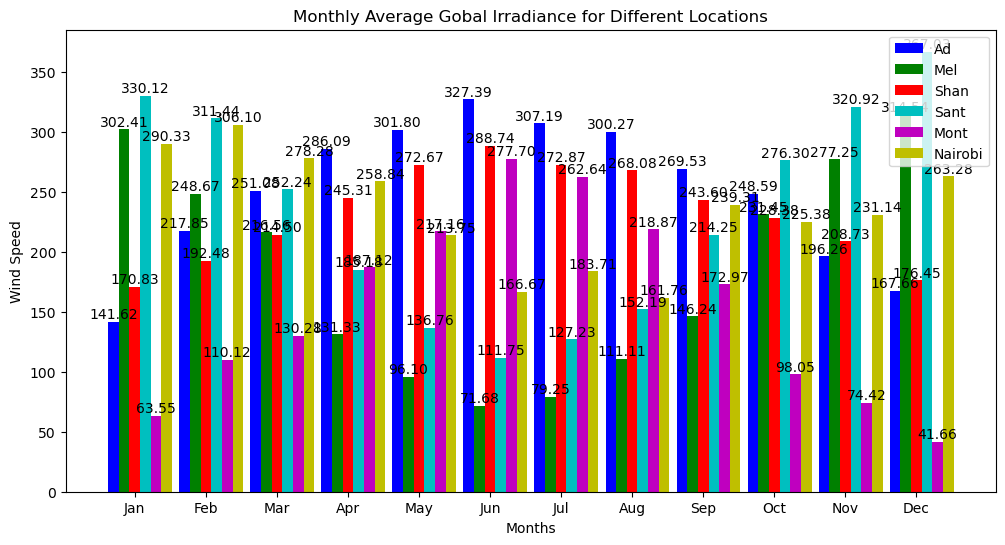

In [10]:
#plotting average global irradiance

# Combine the data into a single list for the x-axis labels (months)
months = monthly_average_ad.index.strftime('%b')

# Set up the bar positions
bar_width = 0.15
bar_positions = np.arange(len(months))

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot the bars for each location
plt.bar(bar_positions - 2 * bar_width, Ad_irr, width=bar_width, label='Ad', color='b')
plt.bar(bar_positions - bar_width, Mel_irr, width=bar_width, label='Mel', color='g')
plt.bar(bar_positions, Shan_irr, width=bar_width, label='Shan', color='r')
plt.bar(bar_positions + bar_width, Sant_irr, width=bar_width, label='Sant', color='c')
plt.bar(bar_positions + 2 * bar_width, Mont_irr, width=bar_width, label='Mont', color='m')
plt.bar(bar_positions + 3 * bar_width, Nairobi_irr, width=bar_width, label='Nairobi', color='y')

# Annotate each bar with its numeric value
for i, value in enumerate(Ad_irr):
    plt.text(i - 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mel_irr):
    plt.text(i - bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Shan_irr):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Sant_irr):
    plt.text(i + bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mont_irr):
    plt.text(i + 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Nairobi_irr):
    plt.text(i + 3 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Wind Speed')
plt.title('Monthly Average Gobal Irradiance for Different Locations')
plt.xticks(bar_positions, months)
plt.legend()

# Show the plot
plt.show()

### Comparing Monthly average wind speed

In [11]:
Ad_wind = monthly_average_ad['WS10m']
Mel_wind = monthly_average_mel['WS10m']
Shan_wind = monthly_average_shan['WS10m']
Sant_wind = monthly_average_sant['WS10m']
Mont_wind = monthly_average_mont['WS10m']
Nairobi_wind = monthly_average_nairobi['WS10m']

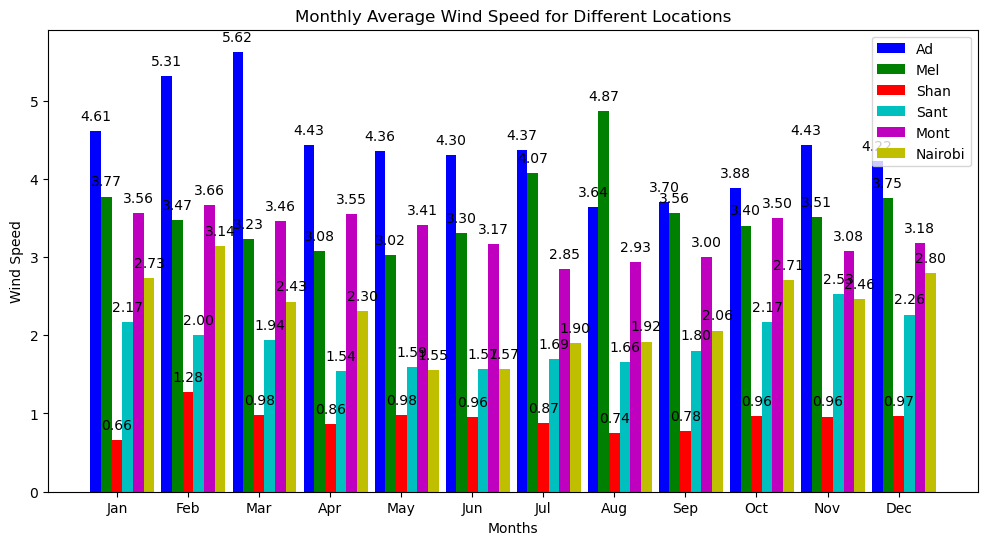

In [12]:
#plotting average wind speed

# Combine the data into a single list for the x-axis labels (months)
months = monthly_average_ad.index.strftime('%b')

# Set up the bar positions
bar_width = 0.15
bar_positions = np.arange(len(months))

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot the bars for each location
plt.bar(bar_positions - 2 * bar_width, Ad_wind, width=bar_width, label='Ad', color='b')
plt.bar(bar_positions - bar_width, Mel_wind, width=bar_width, label='Mel', color='g')
plt.bar(bar_positions, Shan_wind, width=bar_width, label='Shan', color='r')
plt.bar(bar_positions + bar_width, Sant_wind, width=bar_width, label='Sant', color='c')
plt.bar(bar_positions + 2 * bar_width, Mont_wind, width=bar_width, label='Mont', color='m')
plt.bar(bar_positions + 3 * bar_width, Nairobi_wind, width=bar_width, label='Nairobi', color='y')

# Annotate each bar with its numeric value
for i, value in enumerate(Ad_wind):
    plt.text(i - 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mel_wind):
    plt.text(i - bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Shan_wind):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Sant_wind):
    plt.text(i + bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mont_wind):
    plt.text(i + 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Nairobi_wind):
    plt.text(i + 3 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Wind Speed')
plt.title('Monthly Average Wind Speed for Different Locations')
plt.xticks(bar_positions, months)
plt.legend()

# Show the plot
plt.show()

### Comparing monthly average cloudiness

In [13]:
Ad_cloud = monthly_average_ad['cloud']
Mel_cloud = monthly_average_mel['cloud']
Shan_cloud = monthly_average_shan['cloud']
Sant_cloud = monthly_average_sant['cloud']
Mont_cloud = monthly_average_mont['cloud']
Nairobi_cloud = monthly_average_nairobi['cloud']

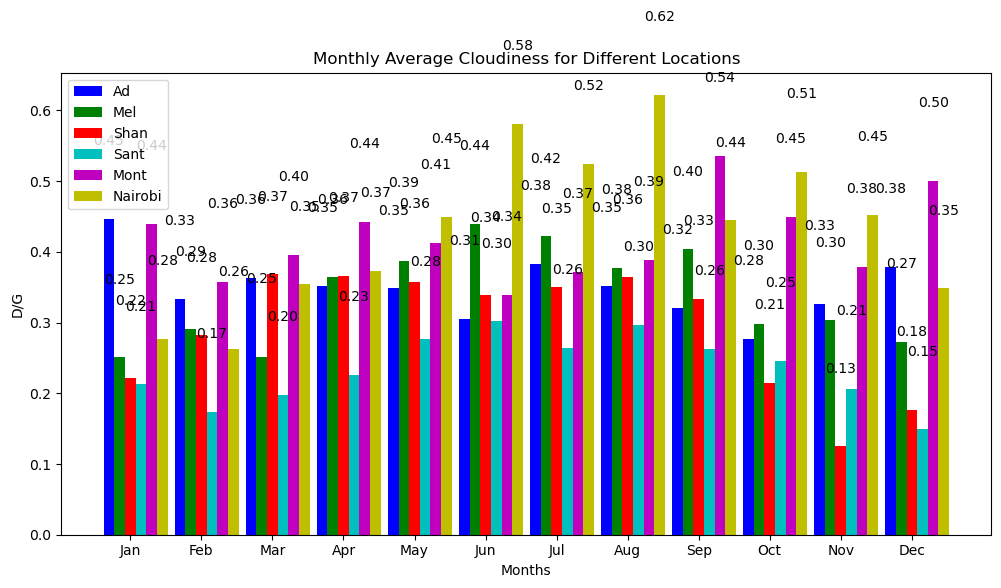

In [14]:
#plotting average cloudiness

# Combine the data into a single list for the x-axis labels (months)
months = monthly_average_ad.index.strftime('%b')

# Set up the bar positions
bar_width = 0.15
bar_positions = np.arange(len(months))

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot the bars for each location
plt.bar(bar_positions - 2 * bar_width, Ad_cloud, width=bar_width, label='Ad', color='b')
plt.bar(bar_positions - bar_width, Mel_cloud, width=bar_width, label='Mel', color='g')
plt.bar(bar_positions, Shan_cloud, width=bar_width, label='Shan', color='r')
plt.bar(bar_positions + bar_width, Sant_cloud, width=bar_width, label='Sant', color='c')
plt.bar(bar_positions + 2 * bar_width, Mont_cloud, width=bar_width, label='Mont', color='m')
plt.bar(bar_positions + 3 * bar_width, Nairobi_cloud, width=bar_width, label='Nairobi', color='y')

# Annotate each bar with its numeric value
for i, value in enumerate(Ad_cloud):
    plt.text(i - 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mel_cloud):
    plt.text(i - bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Shan_cloud):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Sant_cloud):
    plt.text(i + bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mont_cloud):
    plt.text(i + 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Nairobi_cloud):
    plt.text(i + 3 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Months')
plt.ylabel('D/G')
plt.title('Monthly Average Cloudiness for Different Locations')
plt.xticks(bar_positions, months)
plt.legend()

# Show the plot
plt.show()

### Comparing montly average cell temperature

In [15]:
Ad_cell = monthly_average_ad['cell_temp']
Mel_cell = monthly_average_mel['cell_temp']
Shan_cell = monthly_average_shan['cell_temp']
Sant_cell = monthly_average_sant['cell_temp']
Mont_cell = monthly_average_mont['cell_temp']
Nairobi_cell = monthly_average_nairobi['cell_temp']

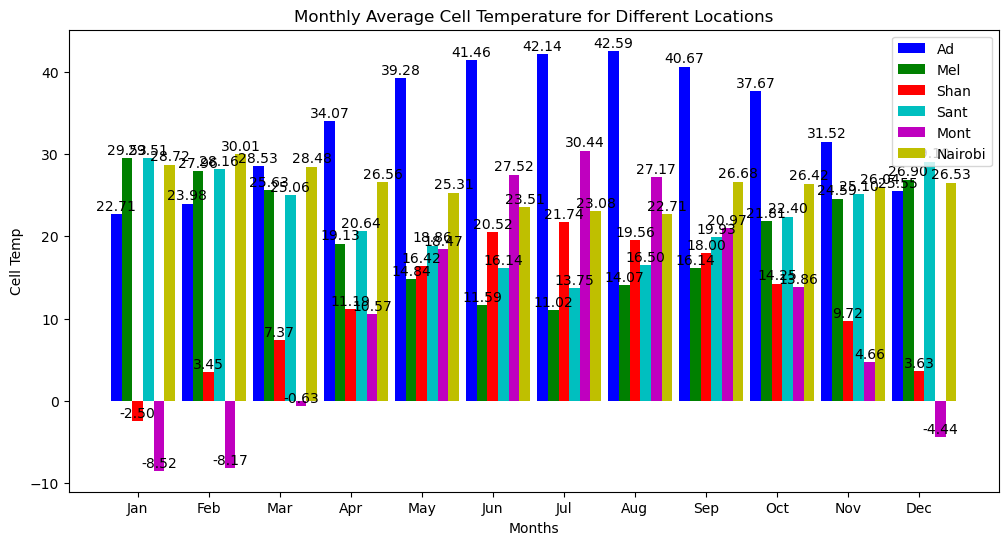

In [16]:
#plotting average cloudiness

# Combine the data into a single list for the x-axis labels (months)
months = monthly_average_ad.index.strftime('%b')

# Set up the bar positions
bar_width = 0.15
bar_positions = np.arange(len(months))

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot the bars for each location
plt.bar(bar_positions - 2 * bar_width, Ad_cell, width=bar_width, label='Ad', color='b')
plt.bar(bar_positions - bar_width, Mel_cell, width=bar_width, label='Mel', color='g')
plt.bar(bar_positions, Shan_cell, width=bar_width, label='Shan', color='r')
plt.bar(bar_positions + bar_width, Sant_cell, width=bar_width, label='Sant', color='c')
plt.bar(bar_positions + 2 * bar_width, Mont_cell, width=bar_width, label='Mont', color='m')
plt.bar(bar_positions + 3 * bar_width, Nairobi_cell, width=bar_width, label='Nairobi', color='y')

# Annotate each bar with its numeric value
for i, value in enumerate(Ad_cell):
    plt.text(i - 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mel_cell):
    plt.text(i - bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Shan_cell):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Sant_cell):
    plt.text(i + bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Mont_cell):
    plt.text(i + 2 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(Nairobi_cell):
    plt.text(i + 3 * bar_width, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Cell Temp')
plt.title('Monthly Average Cell Temperature for Different Locations')
plt.xticks(bar_positions, months)
plt.legend()

# Show the plot
plt.show()

# COMPUTATION OF OPTIMAL TILT ANGLE

### Loading location data

In [17]:
#Defining a list to hold multiple lists, each corresponding to the tilt angle and global irradiance of each city 
final_list=[]

#Defining an array to hold the local location of the TMY files for different cities
Cities=['Abu Dhabi', 'Melbourne','Shannan','Santiago','Montreal', 'Nairobi']
Timezones=['Asia/Dubai','Australia/Melbourne','Asia/Shanghai','America/Santiago','America/Montreal','Africa/Nairobi']
Coordinates=[[24.454,54.377],[-37.812,144.948],[29.240, 91.771], [-31.761, -71.319], [45.551, -73.602], [-1.303, 36.826]]
Cities_file=['G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\AD_data.csv',
             'G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Mel_data.csv',
             'G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Shannan_data.csv',
             'G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Sant_data.csv',
             'G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Mont_data.csv',
             'G:\\My Drive\\EIT INNO ENERGY\\YEAR 1\\Coursework\\SEM 2\\Project on wind and solar\\Negar and Rachael\\Data\\TMY data\\Nairobi_data.csv'
            ]

#Defining solar module used in the project
sandia_modules=pvlib.pvsystem.retrieve_sam('SandiaMod')
Module=sandia_modules['SolarWorld_Sunmodule_250_Poly__2013_']

#Setting output display constraints
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

#Defining variables to store the results for every city
#Cell_Temperature
#Global_Irradiance
#Temperature
#Wind
DC_Power=[]
#Tilt


### Calculating fixed tilt based on average global irradiance

In [18]:
#Defining a list to hold multiple lists, each corresponding to the tilt angle and global irradiance of each city 
final_list=[]
best_tilts=[]
#Calculating global irradiance for different tilt angles in one city
for i in range(len(Cities)):
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=pd.date_range(start="2021-01-01 00:00", end="2021-12-31 23:00",freq="h")
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    if(latitude<0):
        Surface_azi=0
    else:
        Surface_azi=180
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    #Obtaining Zenith, Elevation and Azimuth
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values
    #Setting tilt range to calculate corresponding global irradiance
    pitch_angles= range(0,91,5)
    irradiance_tilt =[]
    tilt_angle = []
    #Calculating global irradiance for every tilt angle
    for pitch in pitch_angles:
        total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=pitch,
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )

        #Finding mean global irradiance
        avg_global_irrad = total_irrad.poa_global.mean()
        tilt_angle.append(pitch)
        irradiance_tilt.append(avg_global_irrad)
    maximum_avg_global_irradiance=max(irradiance_tilt)
    index = irradiance_tilt.index(maximum_avg_global_irradiance)
    optimum_tilt=tilt_angle[index]
    print("Optimum tilt angle for",Cities[i], "is", optimum_tilt)
    best_tilts.append(optimum_tilt)
    final_relation=list(zip(tilt_angle,irradiance_tilt))
    final_list.append(final_relation)
    
#print(best_tilts)

Optimum tilt angle for Abu Dhabi is 20
Optimum tilt angle for Melbourne is 30
Optimum tilt angle for Shannan is 30
Optimum tilt angle for Santiago is 25
Optimum tilt angle for Montreal is 35
Optimum tilt angle for Nairobi is 0


#### PLOT

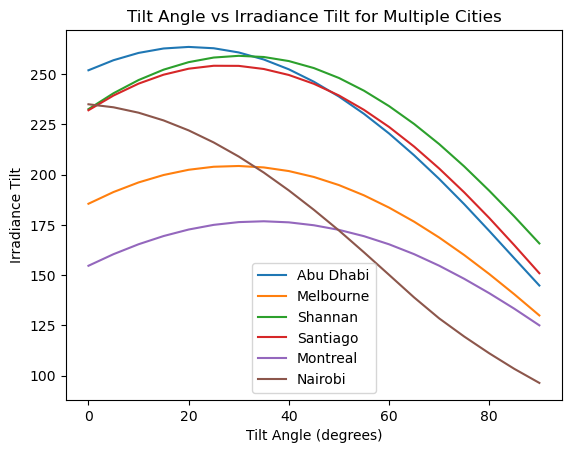

In [19]:
data_by_city = {city: [] for city in Cities}

for idx, city_data in enumerate(final_list):
    data_by_city[Cities[idx]].extend(city_data)

# Plotting the data
fig, ax = plt.subplots()

for city, city_data in data_by_city.items():
    tilt_angles, irradiance_values = zip(*city_data)
    ax.plot(tilt_angles, irradiance_values, label=f'{city}')

# Adding labels and title
ax.set_xlabel('Tilt Angle (degrees)')
ax.set_ylabel('Irradiance Tilt')
ax.set_title('Tilt Angle vs Irradiance Tilt for Multiple Cities')

# Displaying legend
ax.legend()

# Showing the plot
plt.show()

#### Computing DC power at this fixed tilt throughout the year

In [20]:
#to store the average DC power for every city
avg_DC_Power=[]   
#Calculating global irradiance for different tilt angles in one city
for i in range(len(Cities)):
    #Reading the TMY file of every city under consideration
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="")

    #Converting UTC to local time to get a clear understanding of the data analyzed
    Local_time=pytz.timezone(Timezones[i])
    tmy.index=tmy.index.tz_localize(pytz.utc,ambiguous='NaT').tz_convert(Local_time)
    
    #Obtaining coordinates for each location 
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    
    #Condition to fix the orientation of the panel based on the location of the city
    if(latitude<0):
        Surface_azi=0
    else:
        Surface_azi=180
        
    #Calulation of solar zenith and azimuth values
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values
    
    #Obtaining other parameters to calculate irradiance and thereby DC power
    airtemp=tmy.T2m
    windspeed=tmy.WS10m
    airmass_relative = pvlib.atmosphere.get_relative_airmass(zenith = tmy.SZA , model='kastenyoung1989')
    #print (airmass_relative)
    airmass_abs = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure=101325.0)

    #Getting fixed tilt angle from the previous results
    pitch=best_tilts[i]
    
    #Temporary variables
    tilt_angle=[]
    
    total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=pitch,
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
    direct=total_irrad.poa_direct
    diffuse=total_irrad.poa_diffuse
    globalirr=total_irrad.poa_global
    #Calculating cell_temp by assuming a,b and delT according to documentation
    cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
    #print(cell_temp)
    Aoi = pvlib.irradiance.aoi(surface_tilt=pitch, surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
    poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
    #print(poa_effective)
    dc_power=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
    #print(tmy.index, dc_power)
        
    #Finding mean DC Power
    avg_DC_power = dc_power.mean()
    avg_DC_Power.append(avg_DC_power)
        
    #plt.plot(pitch_angles, avg_DC_power_tilt, label=Cities[i])
    #plt.scatter(optimum_tilt, maximum_DC_Power, marker='o', color='red')

#plt.xlabel('Tilt Angle')
#plt.ylabel('Average DC Power (W)')
#plt.title('Average DC Power vs Tilt Angle for Different Cities')
#plt.legend()
#plt.grid(True)
#plt.show()
#print(avg_DC_Power)

## Plot of average DC power for different cities considering global irradiance

<Figure size 1000x600 with 0 Axes>

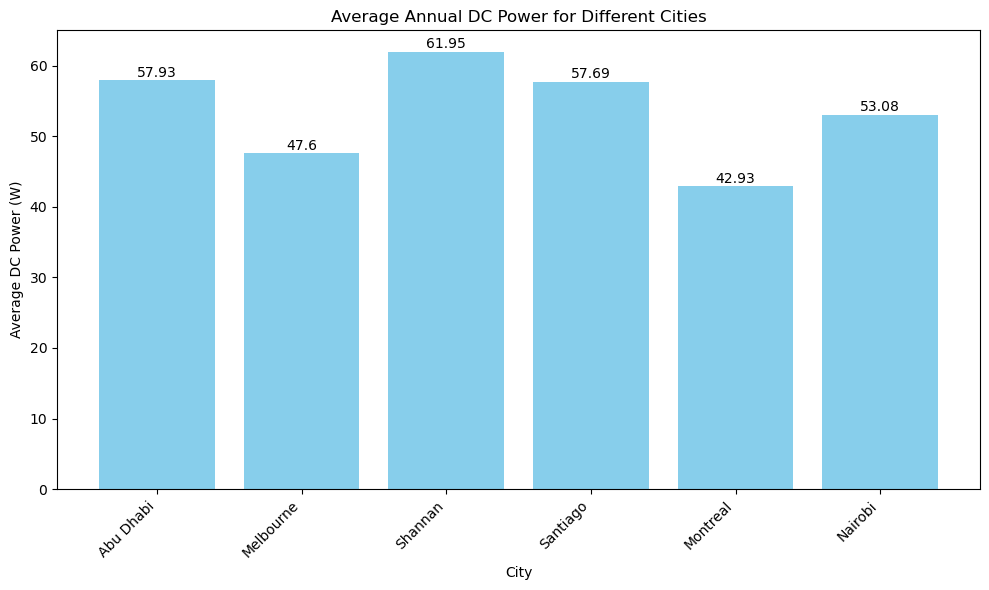

In [21]:
plt.figure(figsize=(10, 6))
cities= ['Abu Dhabi', 'Melbourne','Shannan','Santiago','Montreal', 'Nairobi']
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, avg_DC_Power, color='skyblue')
for bar, power in zip(bars, avg_DC_Power):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(round(power, 2)), ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Average DC Power (W)')
plt.title('Average Annual DC Power for Different Cities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Computing fixed tilt based on average DC power output from the panel

Optimum tilt angle for Abu Dhabi is 20
Optimum tilt angle for Melbourne is 30
Optimum tilt angle for Shannan is 30
Optimum tilt angle for Santiago is 28
Optimum tilt angle for Montreal is 36
Optimum tilt angle for Nairobi is 0


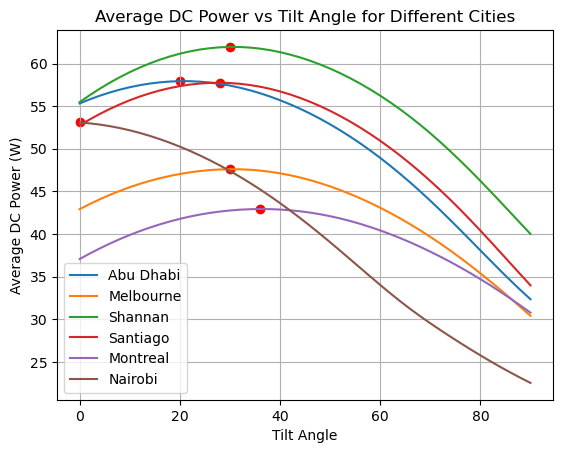

In [22]:
Avg_DC_Power=[] #Stores the average DC Power at optimal tilt for different cities
#Calculating global irradiance for different tilt angles in one city
for i in range(len(Cities)):
    #Reading the TMY file of every city under consideration
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=8760, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=pd.date_range(start="2007-01-01 00:00", end="2007-12-31 23:00",freq="h")

    #Converting UTC to local time to get a clear understanding of the data analyzed
    Local_time=pytz.timezone(Timezones[i])
    tmy.index=tmy.index.tz_localize(pytz.utc,ambiguous='NaT').tz_convert(Local_time)
    
    #Obtaining coordinates for each location 
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    
    #Condition to fix the orientation of the panel based on the location of the city
    if(latitude<0):
        Surface_azi=0
    else:
        Surface_azi=180
        
    #Calulation of solar zenith and azimuth values
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values
    
    #Obtaining other parameters to calculate irradiance and thereby DC power
    airtemp=tmy.T2m
    windspeed=tmy.WS10m
    airmass_relative = pvlib.atmosphere.get_relative_airmass(zenith = tmy.SZA , model='kastenyoung1989')
    #print (airmass_relative)
    airmass_abs = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure=101325.0)

    #Setting tilt range to calculate corresponding global irradiance
    pitch_angles= range(0,91,2)
    irradiance_tilt =[]
    tilt_angle = []
    
    #Temporary variables
    avg_DC_power_tilt=[]   #to store the average DC power for every tilt angle throughout the year
    tilt_angle=[]
    
    #Calculating global irradiance for every tilt angle
    for pitch in pitch_angles:
        total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=pitch,
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
        direct=total_irrad.poa_direct
        diffuse=total_irrad.poa_diffuse
        globalirr=total_irrad.poa_global
        #Calculating cell_temp by assuming a,b and delT according to documentation
        cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
        #print(cell_temp)
        Aoi = pvlib.irradiance.aoi(surface_tilt=pitch, surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
        poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
        #print(poa_effective)
        dc_power=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
        #print(tmy.index, dc_power)
        
        #Finding mean DC Power
        avg_DC_power = dc_power.mean()
        avg_DC_power_tilt.append(avg_DC_power)
        
        tilt_angle.append(pitch)
    DC_Power.append(avg_DC_power_tilt)
    #print(avg_DC_power_tilt)
    maximum_DC_Power=max(avg_DC_power_tilt)
    Avg_DC_Power.append(maximum_DC_Power)
    index = avg_DC_power_tilt.index(maximum_DC_Power)
    optimum_tilt=tilt_angle[index]
    print("Optimum tilt angle for",Cities[i], "is", optimum_tilt)
    plt.plot(pitch_angles, avg_DC_power_tilt, label=Cities[i])
    plt.scatter(optimum_tilt, maximum_DC_Power, marker='o', color='red')

plt.xlabel('Tilt Angle')
plt.ylabel('Average DC Power (W)')
plt.title('Average DC Power vs Tilt Angle for Different Cities')
plt.legend()
plt.grid(True)
plt.show()

## Plot of average DC power for different cities considering temperature and wind

<Figure size 1000x600 with 0 Axes>

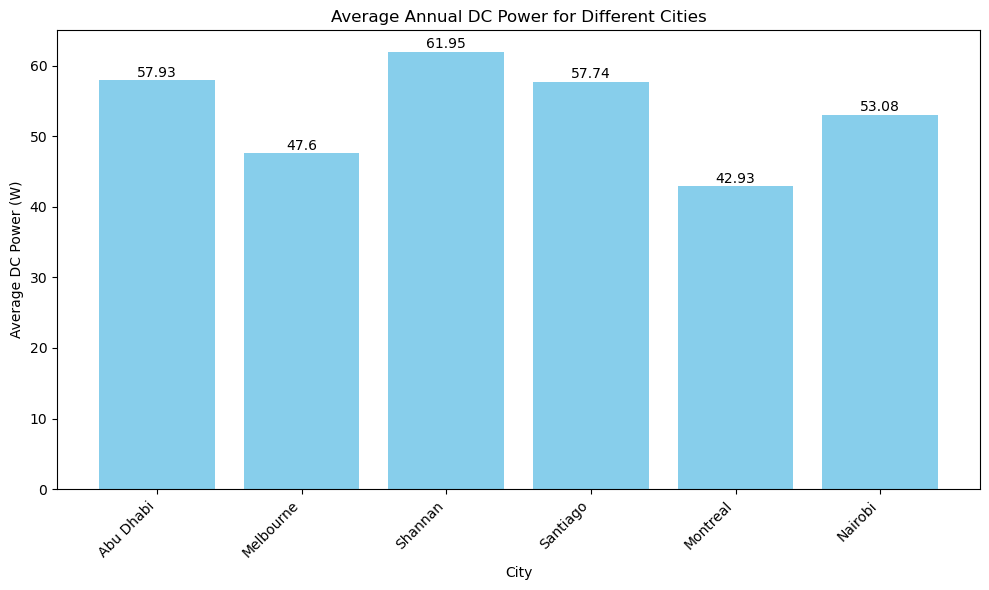

In [23]:
plt.figure(figsize=(10, 6))
cities= ['Abu Dhabi', 'Melbourne','Shannan','Santiago','Montreal', 'Nairobi']
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, Avg_DC_Power, color='skyblue')
for bar, power in zip(bars, Avg_DC_Power):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(round(power, 2)), ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Average DC Power (W)')
plt.title('Average Annual DC Power for Different Cities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Computing fixed tilt angle considering seasonality

#### SUMMER SEASON

In [1]:
#Northern Hemisphere: May, June, July, August, September, October
#Southern Hemisphere: November, December, January, February, March, April
Avg_Summer_Power=[]
for i in range(len(Cities)):
    #Obtaining coordinates for each location 
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    if latitude>0:
        x=pd.date_range(start="2007-05-01 00:00", end="2007-10-31 23:00",freq="h")
        Surface_azi=180
        a=4416
    else:
        x= pd.date_range(start="2007-11-01 00:00", end="2007-12-31 23:00", freq="h")
        # Extend the date range for November to April
        x_extended = pd.date_range(start="2007-01-01 00:00", end="2007-04-30 23:00", freq="h")
        # Concatenate both date ranges
        x = x.append(x_extended)
        Surface_azi=0
        a=4344
        
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=a, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=x
    
    #Converting UTC to local time to get a clear understanding of the data analyzed
    Local_time=pytz.timezone(Timezones[i])
    tmy.index=tmy.index.tz_localize(pytz.utc,ambiguous='NaT').tz_convert(Local_time)
    
    #Calulation of solar zenith and azimuth values
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values
    
    #Obtaining other parameters to calculate irradiance and thereby DC power
    airtemp=tmy.T2m
    windspeed=tmy.WS10m
    airmass_relative = pvlib.atmosphere.get_relative_airmass(zenith = tmy.SZA , model='kastenyoung1989')
    #print (airmass_relative)
    airmass_abs = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure=101325.0)

    #Setting tilt range to calculate corresponding global irradiance
    pitch_angles= range(0,91,2)
    irradiance_tilt =[]
    tilt_angle = []
    
    #Temporary variables
    avg_DC_power_tilt=[]   #to store the average DC power for every tilt angle throughout the year
    tilt_angle=[]
    
    #Calculating global irradiance for every tilt angle
    for pitch in pitch_angles:
        total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=pitch,
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
        direct=total_irrad.poa_direct
        diffuse=total_irrad.poa_diffuse
        globalirr=total_irrad.poa_global
        #Calculating cell_temp by assuming a,b and delT according to documentation
        cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
        #print(cell_temp)
        Aoi = pvlib.irradiance.aoi(surface_tilt=pitch, surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
        poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
        #print(poa_effective)
        dc_power=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
        #print(tmy.index, dc_power)
        
        #Finding mean DC Power
        avg_DC_power = dc_power.mean()
        avg_DC_power_tilt.append(avg_DC_power)
        
        tilt_angle.append(pitch)
    DC_Power.append(avg_DC_power_tilt)
    maximum_DC_Power=max(avg_DC_power_tilt)
    Avg_Summer_Power.append(maximum_DC_Power)
    index = avg_DC_power_tilt.index(maximum_DC_Power)
    optimum_tilt=tilt_angle[index]
    print("Optimum tilt angle for",Cities[i], "is", optimum_tilt)
    plt.plot(pitch_angles, avg_DC_power_tilt, label=Cities[i])
    plt.scatter(optimum_tilt, maximum_DC_Power, marker='o', color='red')

plt.xlabel('Tilt Angle')
plt.ylabel('Average DC Power (W)')
plt.title('Average DC Power vs Tilt Angle for Different Cities during SUMMER')
plt.legend()
plt.grid(True)
plt.show()
    

NameError: name 'Cities' is not defined

## Plot of average DC power during summer for different cities 

<Figure size 1000x600 with 0 Axes>

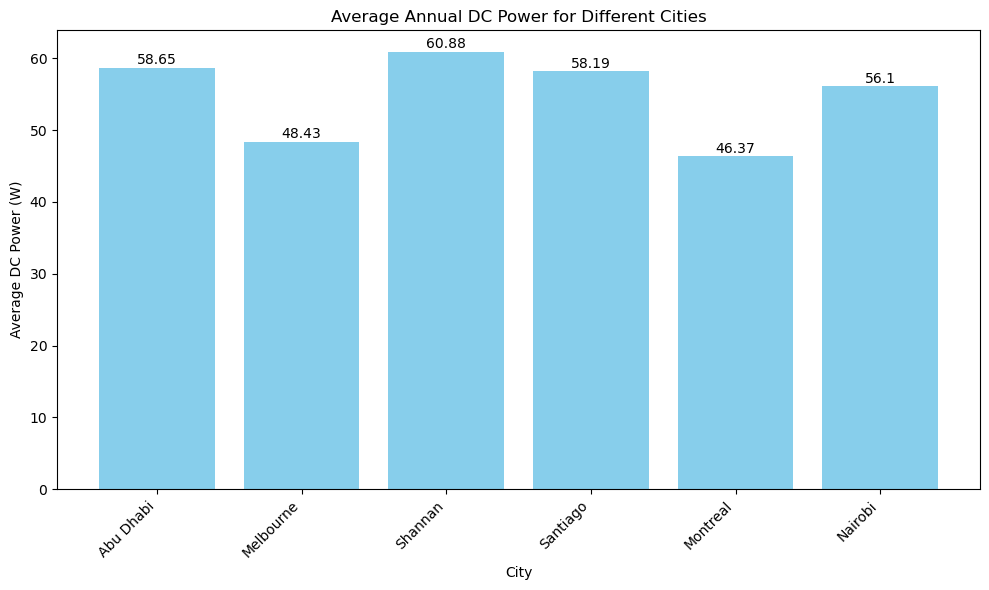

In [25]:
plt.figure(figsize=(10, 6))
cities= ['Abu Dhabi', 'Melbourne','Shannan','Santiago','Montreal', 'Nairobi']
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, Avg_Summer_Power, color='skyblue')
for bar, power in zip(bars, Avg_Summer_Power):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(round(power, 2)), ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Average DC Power (W)')
plt.title('Average Annual DC Power for Different Cities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### WINTER SEASON

Optimum tilt angle for Abu Dhabi is 34
Optimum tilt angle for Melbourne is 54
Optimum tilt angle for Shannan is 42
Optimum tilt angle for Santiago is 50
Optimum tilt angle for Montreal is 52
Optimum tilt angle for Nairobi is 20


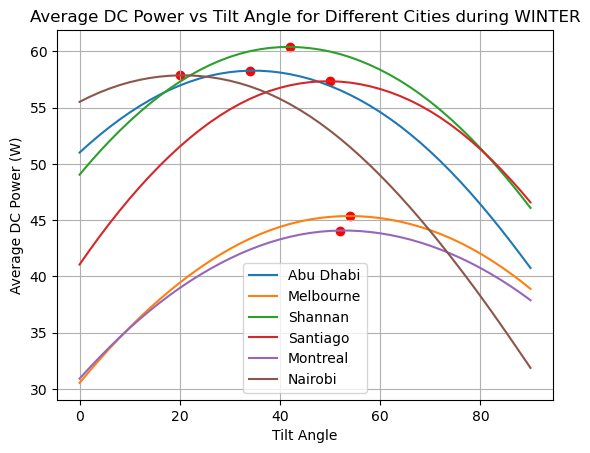

In [26]:
#Northern Hemisphere: November, December, January, February, March, April
#Southern Hemisphere: May, June, July, August, September, October 
Avg_Winter_Power=[]
for i in range(len(Cities)):
    #Obtaining coordinates for each location 
    latitude=Coordinates[i][0]
    longitude=Coordinates[i][1]
    Surface_azi=0
    if latitude>0:
        x= pd.date_range(start="2007-11-01 00:00", end="2007-12-31 23:00", freq="h")
        # Extend the date range for November to April
        x_extended = pd.date_range(start="2007-01-01 00:00", end="2007-04-30 23:00", freq="h")
        # Concatenate both date ranges
        x = x.append(x_extended)
        Surface_azi=180
        a=4344
    else:
        x=pd.date_range(start="2007-05-01 00:00", end="2007-10-31 23:00",freq="h")
        Surface_azi=0
        a=4416
        
    tmy=pd.read_csv(Cities_file[i],skiprows=16,nrows=a, usecols=["time(UTC)", "T2m","G(h)","Gb(n)","Gd(h)","WS10m"],index_col=0)
    tmy.index=x
    
    #Converting UTC to local time to get a clear understanding of the data analyzed
    Local_time=pytz.timezone(Timezones[i])
    tmy.index=tmy.index.tz_localize(pytz.utc,ambiguous='NaT').tz_convert(Local_time)
    
    #Calulation of solar zenith and azimuth values
    SP = pvlib.solarposition.ephemeris(tmy.index, latitude, longitude)
    tmy['SZA'] = SP.apparent_zenith.values
    tmy['SEA'] = SP.apparent_elevation.values
    tmy['SAA'] = SP.azimuth.values
    
    #Obtaining other parameters to calculate irradiance and thereby DC power
    airtemp=tmy.T2m
    windspeed=tmy.WS10m
    airmass_relative = pvlib.atmosphere.get_relative_airmass(zenith = tmy.SZA , model='kastenyoung1989')
    #print (airmass_relative)
    airmass_abs = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure=101325.0)

    #Setting tilt range to calculate corresponding global irradiance
    pitch_angles= range(0,91,2)
    irradiance_tilt =[]
    tilt_angle = []
    
    #Temporary variables
    avg_DC_power_tilt=[]   #to store the average DC power for every tilt angle throughout the year
    tilt_angle=[]
    
    #Calculating global irradiance for every tilt angle
    for pitch in pitch_angles:
        total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt=pitch,
                                                            surface_azimuth= Surface_azi,
                                                            solar_zenith = tmy['SZA'],
                                                            solar_azimuth = tmy['SAA'],
                                                            dni = tmy['Gb(n)'],
                                                            ghi = tmy['G(h)'],
                                                            dhi = tmy['Gd(h)'],
                                                            dni_extra='none',#pvlib.irradiance.get_extra_radiation(datetime_or_doy=Dp.index.dayofyear),
                                                            model='isotropic',
                                                            #model='king',
                                                            #model='klucher',
                                                            #model = 'haydavies'
                                                               )
        direct=total_irrad.poa_direct
        diffuse=total_irrad.poa_diffuse
        globalirr=total_irrad.poa_global
        #Calculating cell_temp by assuming a,b and delT according to documentation
        cell_temp = pvlib.temperature.sapm_cell(poa_global=globalirr, temp_air=airtemp, wind_speed=windspeed, a=-3.47, b=-0.0594, deltaT=3, irrad_ref=1000.0)
        #print(cell_temp)
        Aoi = pvlib.irradiance.aoi(surface_tilt=pitch, surface_azimuth=Surface_azi, solar_zenith=tmy['SZA'], solar_azimuth=tmy['SAA'])
        poa_effective=pvlib.pvsystem.sapm_effective_irradiance(poa_direct=direct, poa_diffuse=diffuse, airmass_absolute=airmass_abs, aoi=Aoi, module=Module)
        #print(poa_effective)
        dc_power=pvlib.pvsystem.pvwatts_dc(g_poa_effective=poa_effective, temp_cell=cell_temp, pdc0=250, gamma_pdc=-0.0045 , temp_ref=25.0)
        #print(tmy.index, dc_power)
        
        #Finding mean DC Power
        avg_DC_power = dc_power.mean()
        avg_DC_power_tilt.append(avg_DC_power)
        tilt_angle.append(pitch)
    DC_Power.append(avg_DC_power_tilt)
    maximum_DC_Power=max(avg_DC_power_tilt)
    Avg_Winter_Power.append(maximum_DC_Power)
    index = avg_DC_power_tilt.index(maximum_DC_Power)
    optimum_tilt=tilt_angle[index]
    print("Optimum tilt angle for",Cities[i], "is", optimum_tilt)
    plt.plot(pitch_angles, avg_DC_power_tilt, label=Cities[i])
    plt.scatter(optimum_tilt, maximum_DC_Power, marker='o', color='red')

plt.xlabel('Tilt Angle')
plt.ylabel('Average DC Power (W)')
plt.title('Average DC Power vs Tilt Angle for Different Cities during WINTER')
plt.legend()
plt.grid(True)
plt.show()
    

## Plot of average DC power during winter for different cities 

<Figure size 1000x600 with 0 Axes>

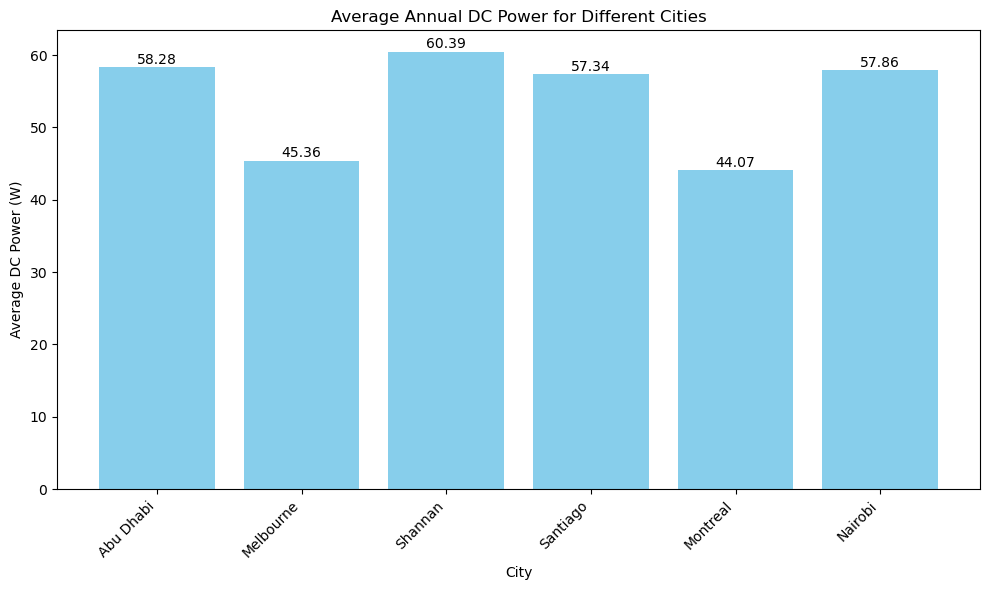

In [27]:
plt.figure(figsize=(10, 6))
cities= ['Abu Dhabi', 'Melbourne','Shannan','Santiago','Montreal', 'Nairobi']
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, Avg_Winter_Power, color='skyblue')
for bar, power in zip(bars, Avg_Winter_Power):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(round(power, 2)), ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Average DC Power (W)')
plt.title('Average Annual DC Power for Different Cities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

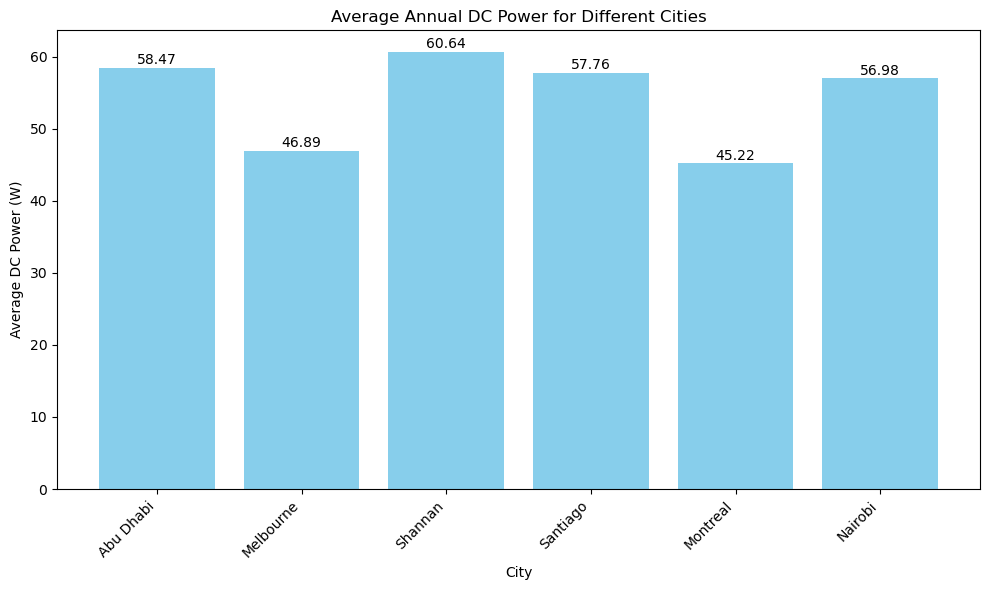

In [28]:
Average=[]
for i in range(len(Avg_Winter_Power)):
    Average. append((Avg_Winter_Power[i]+Avg_Summer_Power[i])/2)
    
plt.figure(figsize=(10, 6))
cities= ['Abu Dhabi', 'Melbourne','Shannan','Santiago','Montreal', 'Nairobi']
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, Average, color='skyblue')
for bar, power in zip(bars, Average):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(round(power, 2)), ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Average DC Power (W)')
plt.title('Average Annual DC Power for Different Cities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()    
    

## One week in summer

In [ ]:
# I chose the first week of summer, from 21th of June to 28th of June

# uploading weekly data 